In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import time
import math  

In [2]:
# Can be commented if already installed
!pip install mlxtend   

## Helper functions

In [3]:
# Computes the correlation coefficient between two lists x & y
def correlation(x, y):
    """
        Parameters x and y are lists.
        Returns the correlation value between x & y
    """
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = (std_deviation_x*std_deviation_y)**0.5
    
    try:
        corr = numerator/denominator
    except:
        return 5     # return some number greater than 1, if the denominator is zero
    return corr

# Extract the top k features from the data
def Extract(data, k):
    for i in range(len(data)):
        data[i] = data[i][:k]
    return data

# Feature Extraction: Split data into training & testing sets
def ExtractData(X_normal, X_malware, k):
    """
        X_normal, X_malware are lists, containing benign & malware datapoints respectively.
        Returns X_train, y_train, X_test, y_test
    """
    X_normal = Extract(X_normal, k)
    X_malware = Extract(X_malware, k)
    
    # 70% training and 30% test
    y_normal = [0 for i in range(len(X_normal))]
    y_malware = [1 for i in range(len(X_malware))]
    X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.3, random_state=1)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_malware, y_malware, test_size=0.3, random_state=1)
    X_train.extend(X_train2)
    y_train.extend(y_train2)
    X_test.extend(X_test2)
    y_test.extend(y_test2)
    
    random_indices1 = list(range(len(X_train)))
    random_indices2 = list(range(len(X_test)))
    random.shuffle(random_indices1)
    random.shuffle(random_indices2)
    X_train_new = []
    y_train_new = []
    X_test_new = []
    y_test_new = []

    for idx in random_indices1:
        X_train_new.append(X_train[idx])
        y_train_new.append(y_train[idx])
    for idx in random_indices2:
        X_test_new.append(X_test[idx])
        y_test_new.append(y_test[idx])

    X_train = X_train_new
    y_train = y_train_new
    X_test = X_test_new
    y_test = y_test_new
    
    return X_train, y_train, X_test, y_test

# Choose top k features from training & test data
def ReduceData(X_train, y_train, X_test, y_test, k):
    X_train = Extract(X_train, k)
    X_test = Extract(X_test, k)
    return X_train, y_train, X_test, y_test

# Calculates the accuracy of predictions made by a model
def ComputeAccuracy(y_pred, y_test):
    match = (y_test == y_pred).sum()
    accuracy = match/len(y_test)
    return accuracy*100

## Classifiers

In [4]:
# BayesNet
#https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/

# Naive Bayes
# https://scikit-learn.org/stable/modules/naive_bayes.html
def NaiveBayes(X_train, y_train, X_test, y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

# https://www.datacamp.com/tutorial/understanding-logistic-regression-python
def Logistic(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

# MultiPerceptron
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#:~:text=Multi%2Dlayer%20Perceptron%20(MLP),number%20of%20dimensions%20for%20output.
def MLP(X_train, y_train, X_test, y_test):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 100), random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

# SGD : Stochastic Gradient Descent
# https://scikit-learn.org/stable/modules/sgd.html
def SGD(X_train, y_train, X_test, y_test):
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

# Simple Logistic 



# SMO 
# https://www.codeproject.com/Articles/1267445/An-Introduction-to-Support-Vector-Machine-SVM-and


# JRIP


# OneR Classifier
# https://rasbt.github.io/mlxtend/user_guide/classifier/OneRClassifier/
from mlxtend.classifier import OneRClassifier
def OneR(X_train, y_train, X_test, y_test):
    oner = OneRClassifier()
    oner.fit(X_train, y_train)
    oner.predict(X_train)
    y_pred = oner.predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

# Decision Tree based classifiers
# https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier
def DecisionTree(X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = ComputeAccuracy(y_pred, y_test)
    return accuracy

In [5]:
# Function to apply all the classifiers on the dataset
def ApplyClassifiers(X_train, y_train, X_test, y_test):
    accuracies = []
    
    # Naive Bayes Classifier
    accuracy = NaiveBayes(X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    print(f"Naive Bayes: {accuracy}")
    
    # Logistic Regression
    accuracy = Logistic(X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    print(f"Logistic Regression: {accuracy}")
    
    # Multilayer Perceptron
    accuracy = MLP(X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    print(f"Multilayer Perceptron: {accuracy}")
    
    # Stochastic Gradient Descent (SGD)
    accuracy = SGD(X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    print(f"Stochastic Gradient Descent: {accuracy}")
    
    # Decision Tree (J48)
    accuracy = DecisionTree(X_train, y_train, X_test, y_test)
    accuracies.append(accuracy)
    print(f"Decision Tree: {accuracy}")
    
    # OneR Classifier
#     X_train = np.array(X_train)
#     y_train = np.array(y_train)
#     X_test  = np.array(X_test)
#     y_test  = np.array(y_test)
#     accuracy = OneR(X_train, y_train, X_test, y_test)
#     accuracies.append(accuracy)
#     print(f"OneR: {accuracy}")
    
    return accuracies

## Read Data from the csv file

In [6]:
# Read data as a pandas dataframe
data = pd.read_csv("dataset.csv")



In [7]:
# Extract benign & malware datapoints separately based on the binarylabel attribute from the data
benign_df = data.loc[data['binarylabel'] == 0]
benign_df_rows = benign_df.to_numpy().tolist()

malware_df = data.loc[data['binarylabel'] == 1]
malware_df_rows = malware_df.to_numpy().tolist()

## Re-order the data with the highest contributing (in terms of correlation) features first

In [8]:
c_partition = []
for i in range(len(benign_df_rows)):
    c_partition.append(0)
for i in range(len(malware_df_rows)):
    c_partition.append(1)
    
required_feature = []

# Compute the correlation for each feature
for i in range(55):
    temp = []
    for j in range(len(benign_df_rows)):
        temp.append(benign_df_rows[j][i])
    for j in range(len(malware_df_rows)):
        temp.append(malware_df_rows[j][i])
    required_feature.append([abs(correlation(temp,c_partition)), i])

# sort the correlation values
required_feature.sort()

# Create normal & malware lists with features arranged in the decreasing order of their 
# relevance (correlation)
X_normal = []
X_malware = []

featurelist = []

for i in range(32):
    featurelist.append(required_feature[52-i][1])

for i in range(len(benign_df_rows)):
    X_normal.append([])
    for j in range(32):
        X_normal[i].append(benign_df_rows[i][featurelist[j]])

for i in range(len(malware_df_rows)):
    X_malware.append([])
    for j in range(32):
        X_malware[i].append(malware_df_rows[i][featurelist[j]])

accuracies_global = []

In [9]:
X_train_original, y_train_original, X_test_original, y_test_original = ExtractData(X_normal, X_malware, 32)

In [10]:
# Using top 1 feature
X_train, y_train, X_test, y_test = ReduceData(X_train_original, y_train_original, X_test_original, y_test_original, 1)
accuracies = ApplyClassifiers(X_train, y_train, X_test, y_test)
accuracies_global.append(accuracies)

Naive Bayes: 51.39925138161905
Logistic Regression: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Multilayer Perceptron: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Stochastic Gradient Descent: 62.95799978841203
Decision Tree: 62.18041400712346


In [11]:
# Using top 2 features
#X_train, y_train, X_test, y_test = ExtractData(X_normal, X_malware, 2)
X_train, y_train, X_test, y_test = ReduceData(X_train_original, y_train_original, X_test_original, y_test_original, 2)
accuracies = ApplyClassifiers(X_train, y_train, X_test, y_test)
accuracies_global.append(accuracies)

Naive Bayes: 51.39925138161905
Logistic Regression: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Multilayer Perceptron: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Stochastic Gradient Descent: 62.29351281366656
Decision Tree: 62.18041400712346


In [12]:
# Using top 4 features
X_train, y_train, X_test, y_test = ReduceData(X_train_original, y_train_original, X_test_original, y_test_original, 4)
accuracies = ApplyClassifiers(X_train, y_train, X_test, y_test)
accuracies_global.append(accuracies)

Naive Bayes: 51.39925138161905
Logistic Regression: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Multilayer Perceptron: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Stochastic Gradient Descent: 43.72163083945007
Decision Tree: 62.18041400712346


In [13]:
# Using top 8 features
X_train, y_train, X_test, y_test = ReduceData(X_train_original, y_train_original, X_test_original, y_test_original, 8)
accuracies = ApplyClassifiers(X_train, y_train, X_test, y_test)
accuracies_global.append(accuracies)

Naive Bayes: 51.39925138161905
Logistic Regression: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Multilayer Perceptron: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Stochastic Gradient Descent: 62.276888044776044
Decision Tree: 62.18041400712346


In [14]:
# Using top 32 features
X_train, y_train, X_test, y_test = X_train_original, y_train_original, X_test_original, y_test_original
accuracies = ApplyClassifiers(X_train, y_train, X_test, y_test)
accuracies_global.append(accuracies)

Naive Bayes: 51.39925138161905
Logistic Regression: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Multilayer Perceptron: 56.27836916054992


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Stochastic Gradient Descent: 43.72163083945007
Decision Tree: 62.18041400712346


## Creating a bar plot of accuracies for each classifier with different number of features

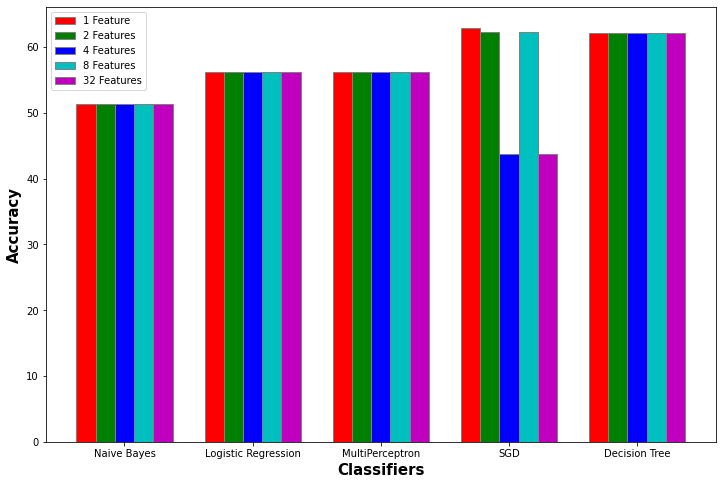

In [16]:
barWidth = 0.15
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
features_1 = accuracies_global[0]
features_4 = accuracies_global[1]
features_8 = accuracies_global[2]
features_16 = accuracies_global[3]
features_32 = accuracies_global[4]
 
# Set position of bar on X axis
br1 = np.arange(len(features_1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, features_1, color ='r', width = barWidth, edgecolor ='grey', label ='1 Feature')
plt.bar(br2, features_4, color ='g', width = barWidth, edgecolor ='grey', label ='2 Features')
plt.bar(br3, features_8, color ='b', width = barWidth, edgecolor ='grey', label ='4 Features')
plt.bar(br4, features_16, color ='c', width = barWidth,edgecolor ='grey', label ='8 Features')
plt.bar(br5, features_32, color ='m', width = barWidth,edgecolor ='grey', label ='32 Features')
 
# Adding Xticks
plt.xlabel('Classifiers', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r +2* barWidth for r in range(len(features_1))],
        ['Naive Bayes', 'Logistic Regression', 'MultiPerceptron', 'SGD', 'Decision Tree'])
 
plt.legend()
plt.show()